In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Import data

ymaster = pd.DataFrame()
xmaster = pd.DataFrame()

# Import data
def readadddata(filename):
    global xmaster
    global ymaster
    data = pd.read_csv(filename)
    data = data.drop(['Base'], 1)
    datetimes = data['Date/Time']
    dayofweek = []
    hour = []
    for s in datetimes:
        day = int(s.split('/')[1])%7
        dayofweek.append(day)
        time = int(s.split()[1].split(':')[0])*60+(int(s.split()[1].split(':')[1]))
        hour.append(time)
    data['dayofweek']=dayofweek
    data['hour']=hour
    df = data.drop(['Date/Time'], 1)
    y=df.drop('dayofweek', 1).drop('hour', 1)
    x=df.drop('Lat', 1).drop('Lon', 1)
    xmaster = pd.concat([xmaster, x])
    ymaster = pd.concat([ymaster, y])
    
readadddata('rides_data.csv')
readadddata('uber-raw-data-apr14.csv')
readadddata('uber-raw-data-aug14.csv')
readadddata('uber-raw-data-jul14.csv')
readadddata('uber-raw-data-jun14.csv')
readadddata('uber-raw-data-may14.csv')
ymaster.shape

C:\Users\Joheen\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


(4534327, 2)

In [2]:
xtrain=xmaster[0:3600000]
ytrain=ymaster[0:3600000]
xtest=xmaster[3600000:4534327]
ytest=ymaster[3600000:4534327]
xtest.size

1868654

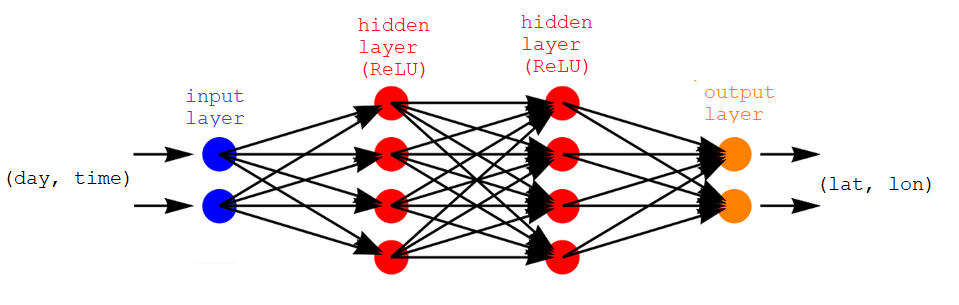

In [3]:
from IPython.display import Image
Image(filename='../RideCast/dnn_diagram.png')

In [4]:
from __future__ import print_function
from keras.layers import Input, Concatenate, Dense, Activation, LSTM, Embedding
from keras.models import Sequential, Model
from sklearn import preprocessing
import numpy as np

input_tensor = Input(shape=(2,))
#x = Embedding(output_dim=512, input_dim=None)(input_tensor)
#x = LSTM(24443,)(input_tensor)
intermediate = Dense(40, activation='relu')(input_tensor)
intermediate = Dense(40, activation='relu')(input_tensor)
# x = Dense(500, activation='tanh')(x)
output_tensor = Dense(2)(intermediate)

model = Model(input_tensor, output_tensor)

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(xtrain, ytrain, epochs=4)

Using TensorFlow backend.


Epoch 1/4
3600000/3600000 [==============================] - 86s 24us/step - loss: 11.4532
Epoch 2/4
3600000/3600000 [==============================] - 87s 24us/step - loss: 0.1932
Epoch 3/4
3600000/3600000 [==============================] - 80s 22us/step - loss: 0.1517
Epoch 4/4
3600000/3600000 [==============================] - 104s 29us/step - loss: 0.1231


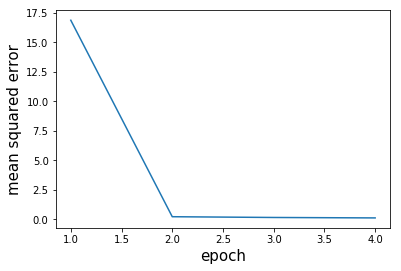

In [7]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4], [16.8620, 0.2253, 0.1609, 0.1235])
plt.ylabel('mean squared error', fontsize=15)
plt.xlabel('epoch', fontsize=15)
plt.show()

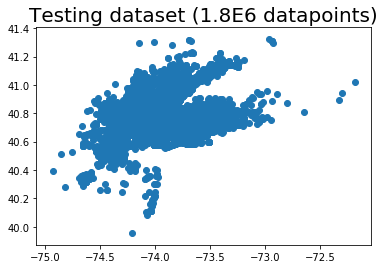

In [9]:
import matplotlib.pyplot as plt
plt.scatter(ytest[['Lon']], ytest[['Lat']])
plt.title("Testing dataset (1.8E6 datapoints)", fontsize=20)
plt.show()

In [ ]:
forecast = model.predict(xtest)

plt.scatter(forecast[:,1], forecast[:,0])
plt.title("DNN model (1.8E6 datapoints)", fontsize=20)
plt.show()